## Rasheed Hameed
## Assignment 2 
## Problem 2 - bank data

__For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in the data section.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data into panda's dataframe
bankdata_df = pd.read_csv("bank_data.csv", sep =',')
bankdata_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


__a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]__

In [3]:
bankdata_df.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [4]:
bankdata_df.shape

(600, 12)

In [8]:
#seperating target pep
df_target = bankdata_df.pep
df_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [16]:
#using only the attributes needed
new_df = bankdata_df[['age', 'income', 'children','gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage']]

In [17]:
#converting into numeric values for the categorical attributes
new_df = pd.get_dummies(new_df, columns=['gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage'])
new_df.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(new_df, df_target, test_size=0.2, random_state=33)

print (vs_test.shape)
print (vs_train.shape)


(120, 19)
(480, 19)


__b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).__

In [24]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)

min_max_scaler = preprocessing.MinMaxScaler().fit(vs_test)
vs_test_norm = min_max_scaler.transform(vs_test)

In [28]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [207]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [208]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [209]:
print (knnpreds_test)

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [210]:
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



In [211]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print (knncm)

[[48 18]
 [23 31]]


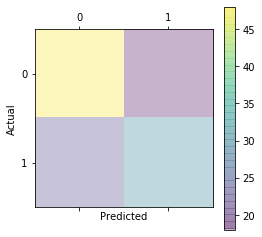

[[48 18]
 [23 31]]


In [212]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm, alpha = 0.3)

plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print (knncm)

In [213]:
#accuracy score on the training data
print ('Test to see accuracy on training:', knnclf.score(vs_train_norm, vs_target_train))
print ('Accuracy score is: ', knnclf.score(vs_test_norm, vs_target_test))


Test to see accuracy on training: 1.0
Accuracy score is:  0.6583333333333333


*testing different k values.  I saw k = 10 to have the higest while testing between values from 1 - 20.  The weights keeping value to be distance instead of uniform gave better result for training and then also for test*

__c. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracy scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?__

In [178]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(vs_train, vs_target_train)

In [185]:
treepreds_test=treeclf.predict(vs_test)

In [186]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.81      0.85      0.83        66
         YES       0.80      0.76      0.78        54

    accuracy                           0.81       120
   macro avg       0.81      0.80      0.81       120
weighted avg       0.81      0.81      0.81       120



In [187]:
treecm = confusion_matrix(vs_target_test, treepreds_test)
print (treecm)

[[56 10]
 [13 41]]


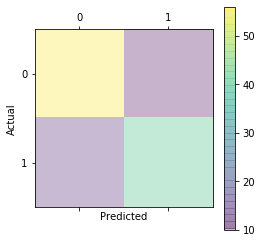

[[56 10]
 [13 41]]


In [189]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm, alpha = 0.3)

plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print (treecm)

In [190]:
#accuracy score on the training data
print ('Test to see accuracy on training:', treeclf.score(vs_train, vs_target_train))
print ('Accuracy score is: ', treeclf.score(vs_test, vs_target_test))

Test to see accuracy on training: 0.9875
Accuracy score is:  0.8083333333333333


In [181]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
print ("Score on Training: ", nbclf.score(vs_train, vs_target_train))
print ("Score on Test: ", nbclf.score(vs_test, vs_target_test))

Score on Training:  0.65625
Score on Test:  0.5916666666666667


In [195]:
nbpreds_test=nbclf.predict(vs_test)

In [196]:
print(classification_report(vs_target_test, nbpreds_test))

              precision    recall  f1-score   support

          NO       0.60      0.74      0.67        66
         YES       0.56      0.41      0.47        54

    accuracy                           0.59       120
   macro avg       0.58      0.57      0.57       120
weighted avg       0.59      0.59      0.58       120



In [197]:
nbcm = confusion_matrix(vs_target_test, nbpreds_test)
print (nbcm)

[[49 17]
 [32 22]]


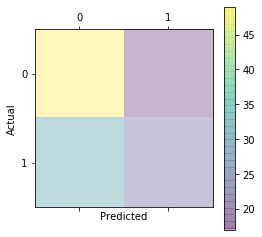

[[49 17]
 [32 22]]


In [198]:
import pylab as plt
%matplotlib inline
plt.matshow(nbcm, alpha = 0.3)

plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print (nbcm)

In [199]:
#accuracy score on the training data
print ('Test to see accuracy on training:', nbclf.score(vs_train, vs_target_train))
print ('Accuracy score is: ', nbclf.score(vs_test, vs_target_test))

Test to see accuracy on training: 0.65625
Accuracy score is:  0.5916666666666667


*Looking from there tree and gaussian method.  We have some assumptions already in placed for each model use.  For trees we have entropy and letting not go pass 3 and for gaussian we are just using default items.  On training data for the tree we are close to 99% which is almost overfitting on the training data and for gaussian method our training is set around 0.66.  We can say it is a better bias tradeoff position on naive bayes method than the decision tress method where we are overfitting on the training data*

__d. Discuss your observations based on the above experiments.__

*observing from different test from above.  Decision trees provided better accuracy results compared to knn and gaussian by just not taking into account on overfitting.  For KNN we saw that at around k=10 we got better results with different metric method use.  Our accuracy score for knn was 65.8%.  Testing on modification for weights between uniform and distance we a difference in training data score to drop from 1.0 to 76% and increase in test scores to 70%.  This can be a bias-trade off where we have to decide which works better.*